<table style="border:none; border-collapse:collapse; cellspacing:0; cellpadding:0">
    <tr>
        <td width=30% style="border:none">
            <img src="logo_datascientest.png" width="100%"/>
        </td>
        <td style="border:none">
            <center>
                <h1>DS project: Customer satisfaction</h1>
                <h2>Data preparation - Reformating files</h2>
            </center>
        </td>
    </tr>
</table>

<hr>

**Date** : 2023

**Author** : Elie MAZE, Luc Thomas

**Goal** : Reformat and clean input files 

In [38]:
import _mypath
import os, glob
import pandas as pd
import re
from uuid import uuid4
import csv

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from data.reformat import correctInputFile, merge

%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Main
## file correction

In [2]:
data_folder = "../input/data"
paths = [path for path in glob.glob(data_folder+"/*.csv") if not "corrected" in path and not "merged" in path]
paths

['../input/data\\dataset_amazon.csv',
 '../input/data\\dataset_cdiscount.csv',
 '../input/data\\dataset_fnac.csv']

In [3]:
for path in paths:
    correctInputFile(path)

## Grouping

In [2]:
merge(data_folder)

## fitering

In [32]:
infile = os.path.join(data_folder, "merged_dataset.csv")
data = pd.read_csv(infile, sep=",", engine='python', encoding="utf-8")
print("data shape:", data.shape)

data shape: (106752, 8)


In [5]:
data.head(5)

,Commentaire,star,date,client,reponse,source,company,langage
0,"Colis commandé mardi 28 fevrier 23 , livraiso...",1,2023-03-07,Toto,NaN,TrustPilot,Amazon,fr
1,Amazon avec sa politique de retour est la pire...,1,2023-03-07,nasri eddine,NaN,TrustPilot,Amazon,fr
2,Dieu sait que j'en connais des déboires avec l...,4,2023-03-07,Amandine,NaN,TrustPilot,Amazon,fr
3,"Nul, preleve une commande que je n'ai jamais r...",1,2023-03-07,Bob Brico,NaN,TrustPilot,Amazon,fr
4,Colis soit disant livré mais jamais reçu donc ...,1,2023-03-06,Client,NaN,TrustPilot,Amazon,fr


In [7]:
data.isna().sum()

Commentaire        0
star               0
date               0
client             1
reponse        82034
source             0
company            0
langage            0
dtype: int64

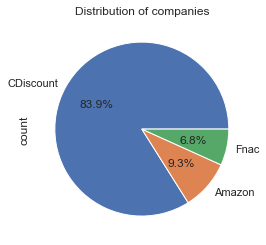

In [14]:
sns.set()
data["company"].value_counts().plot.pie(autopct="%.1f%%")
plt.title("Distribution of companies")
plt.show()

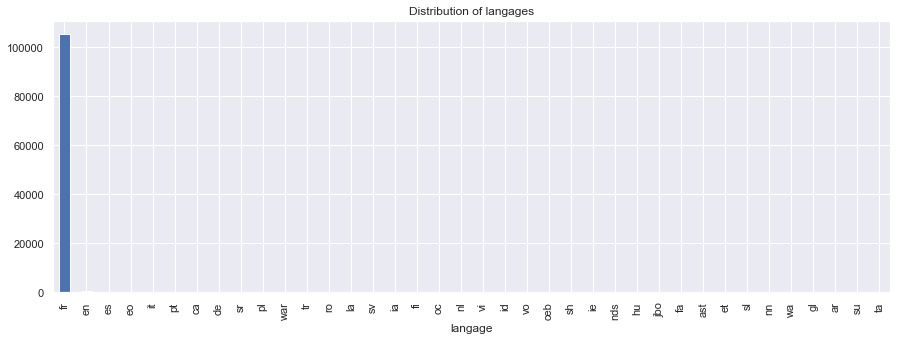

In [13]:
sns.set()
fig = plt.figure(figsize=(15,5))
data["langage"].value_counts().plot.bar()
plt.title("Distribution of langages")
plt.show()

In [33]:
mask = (data["langage"]=="fr")
df = pd.DataFrame(data[mask])
print("data shape:", df.shape)

data shape: (105568, 8)


In [16]:
df.isna().sum()

Commentaire        0
star               0
date               0
client             1
reponse        80905
source             0
company            0
langage            0
dtype: int64

In [25]:
print("Unique clients:", len(df.client.unique()))

Unique clients: 90357


In [35]:
mask = (df.client.isnull())
df.loc[mask, "client"] = [str(uuid4())]

In [37]:
df.isna().sum()

Commentaire        0
star               0
date               0
client             0
reponse        80905
source             0
company            0
langage            0
dtype: int64

In [45]:
df.dtypes

Commentaire    object
star            int64
date           object
client         object
reponse        object
source         object
company        object
langage        object
dtype: object

In [40]:
outfile = os.path.join(data_folder, "cleaned_merged_dataset.csv")
df.to_csv(outfile, sep=",", encoding="utf-8", quoting=csv.QUOTE_ALL, index=False)